In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

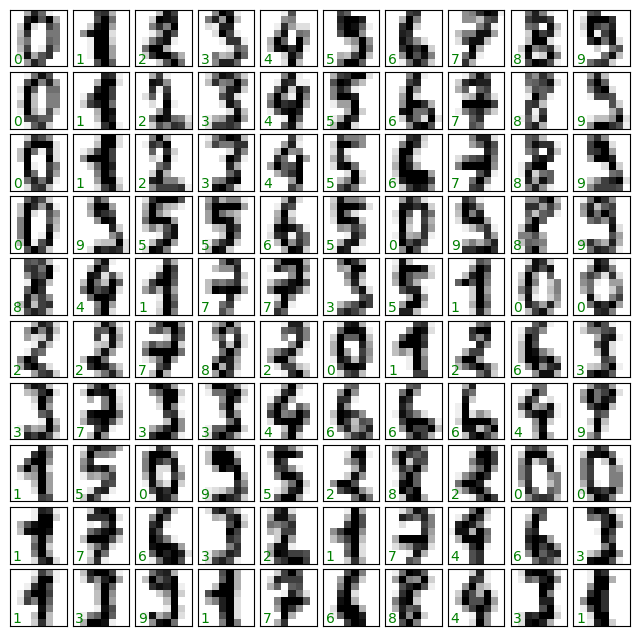

In [2]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
transform=ax.transAxes, color='green')

In [3]:
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

In [ ]:
# Apprentissage non supervisé : réduction de la dimensionnalité
# Nous aimerions visualiser nos points dans l’espace des paramètres à 64 dimensions, mais c’est
# difficile de visualiser efficacement des points dans un espace de si grande dimension. Au lieu de cela, nous allons
# réduisez les dimensions à 2, en utilisant une méthode non supervisée. Ici, nous utiliserons un algorithme d'apprentissage
# multiple appelé Isomap et transformer les données en deux dimensions

In [5]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

C:\Users\s.diedhiou\AppData\Local\anaconda\envs\py38\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\s.diedhiou\AppData\Local\anaconda\envs\py38\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

C:\Users\s.diedhiou\AppData\Local\Temp\ipykernel_21072\3439848037.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("Spectral", 10))


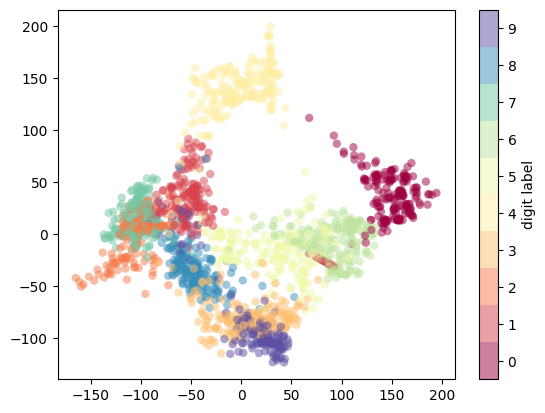

In [6]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor="none", alpha=0.5,
            cmap=plt.cm.get_cmap("Spectral", 10))
plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
# Ce graphique nous donne une bonne intuition sur la façon dont les différents nombres sont séparés
# dans le plus grand espace de 64 dimensions. Par exemple, des zéros et des uns 
# ont très peu de chevauchement dans l’espace des paramètres. Intuitivement, cela a du sens : un zéro est
# vide au milieu de l'image, alors qu'une image aura généralement de l'encre au milieu.
# En revanche, il semble y avoir un spectre plus ou moins continu entre
# les uns et les quatre : on peut comprendre cela en réalisant que certaines personnes dessinent des uns avec
# es « chapeaux » sur eux, ce qui les fait ressembler à quatre personnes.
# Toutefois, dans l’ensemble, les différents groupes semblent assez bien séparés dans le paramètre
# espace : cela nous indique que même un algorithme de classification supervisée très simple
# devrait fonctionner correctement sur ces données. Essayons.

In [ ]:
# Classification 

In [ ]:
# Appliquons un algorithme de classification aux chiffres. Comme pour les données Iris précédemment, nous
# diviserons les données en un ensemble d'entraînement et de test, et ajusterons un modèle Bayesien naïf gaussien :

In [7]:
 from sklearn.model_selection import train_test_split

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
# Maintenant que nous avons prédit notre modèle, nous pouvons évaluer sa précision en comparant les
# vraies valeurs du test défini pour les prédictions :

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [ ]:
# Même avec ce modèle extrêmement simple, nous trouvons une précision d'environ 80 % pour la classification.
# des chiffres. Cependant, ce seul chiffre ne nous dit pas où nous nous sommes trompés...
# une bonne façon de procéder est d'utiliser la matrice de confusion

In [11]:
import seaborn as sns

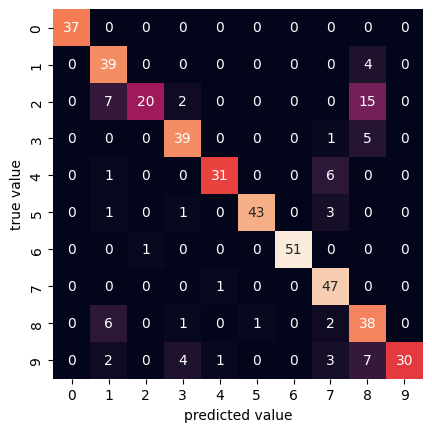

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# Cela nous montre où tendent à se situer les points mal étiquetés : par exemple, un grand nombre de
# ici, les deux sont classés à tort comme un ou huit. Une autre façon d'acquérir de l'intuition
# la caractéristique du modèle est de retracer les entrées, avec leurs étiquettes prédites.
# Nous utiliserons le vert pour les étiquettes correctes et le rouge pour les étiquettes incorrectes.

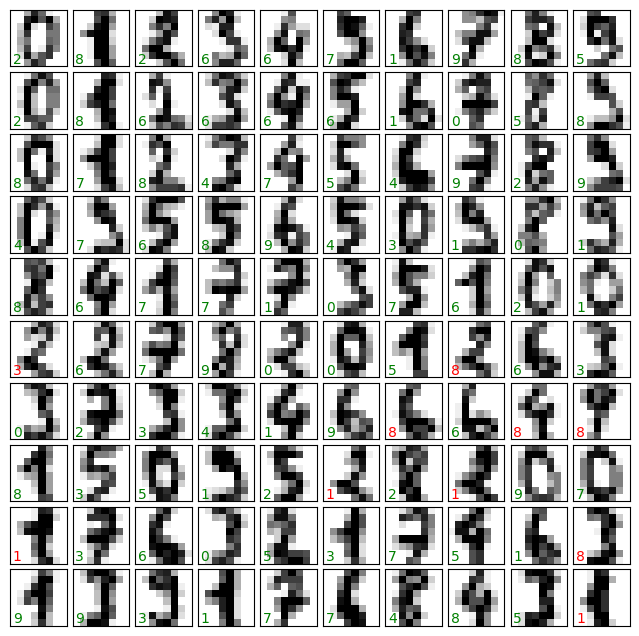

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

In [ ]:
# En examinant ce sous-ensemble de données, nous pouvons mieux comprendre où l'algorithme
# ne fonctionne peut-être pas de manière optimale. Pour aller au-delà de notre taux de classification de 80%, nous
# pourrait passer à un algorithme plus sophistiqué, tel que des machines à vecteurs de support ou des forêts aléatoires 